In [288]:
import os
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from ipyleaflet import Map, basemaps, CircleMarker, LegendControl


In [289]:
os.getcwd()


'/workspaces/Trees-and-Income'

In [290]:
# Loading data

trees = pd.read_csv('data/raw/tree-census-NYC_2015.csv')

income = pd.read_csv('data/raw/income-NYC_2015.csv')

# species = pd.read_csv('data/raw/tree-species-nyc.csv')

In [291]:
# Dealing with encoding issue in tree species data using chardet

with open('data/raw/tree-species-nyc.csv', 'rb') as f:
    result = chardet.detect(f.read())

result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [292]:
species = pd.read_csv('data/raw/tree-species-nyc.csv', encoding=result['encoding'])

In [293]:
trees.head()

,Unnamed: 0,tree_id,tree_dbh,stump_diam,status,health,spc_latin,spc_common,address,zipcode,borocode,boroname,nta_name,state,Latitude,longitude
0,0,180683,3,0,Alive,Fair,Acer rubrum,red maple,108-005 70 AVENUE,11375,4,Queens,Forest Hills,New York,40.723092,-73.844215
1,1,200540,21,0,Alive,Fair,Quercus palustris,pin oak,147-074 7 AVENUE,11357,4,Queens,Whitestone,New York,40.794111,-73.818679
2,2,204026,3,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,390 MORGAN AVENUE,11211,3,Brooklyn,East Williamsburg,New York,40.717581,-73.936608
3,3,204337,10,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1027 GRAND STREET,11211,3,Brooklyn,East Williamsburg,New York,40.713537,-73.934456
4,4,189565,21,0,Alive,Good,Tilia americana,American linden,603 6 STREET,11215,3,Brooklyn,Park Slope-Gowanus,New York,40.666778,-73.975979


In [294]:
income.head()

,GEO_ID,zipcode,HouseholdsEstimateTotal,HouseholdsMargin of ErrorTotal,HouseholdsEstimateMedian income (dollars),HouseholdsMargin of ErrorMedian income (dollars),HouseholdsEstimateMean income (dollars),HouseholdsMargin of ErrorMean income (dollars)
0,8600000US10451,10451,18140,405,26048,2140.0,40836.0,3424.0
1,8600000US10452,10452,25432,368,24790,1337.0,36083.0,1578.0
2,8600000US10453,10453,26802,409,23095,1605.0,33354.0,1416.0
3,8600000US10454,10454,12790,247,20210,1930.0,31533.0,2272.0
4,8600000US10455,10455,14023,329,23253,1598.0,32854.0,2127.0


In [295]:
species.head()


,Scientific name,Common name,Photo,Size,Native Species,Planted in NYC streets,Edible fruit
0,Acer platanoides,Norway maple,NaN,Large,"Non-Native, Invasive[6]","Yes, Approved",No
1,Acer rubrum,Red maple,NaN,Large,Native,Yes,NaN
2,Acer saccharinum,Silver maple,NaN,Large,Native,Yes,NaN
3,Aesculus hippocastanum,Horse-chestnut,NaN,Large,Non-Native,Yes,NaN
4,Aesculus octandra,Common buckeye,NaN,Large,Native,Yes,NaN


# Cleaning trees

In [296]:
trees.columns.tolist()

['Unnamed: 0',
 'tree_id',
 'tree_dbh',
 'stump_diam',
 'status',
 'health',
 'spc_latin',
 'spc_common',
 'address',
 'zipcode',
 'borocode',
 'boroname',
 'nta_name',
 'state',
 'Latitude',
 'longitude']

In [297]:
# Renaming some columns

mapper = {
 'tree_dbh':'trunk_diam',
 'boroname':'borough',
 'nta_name':'neighborhood',
 'Latitude':'latitude'
}

trees = trees.rename(columns=mapper)

trees.head()

,Unnamed: 0,tree_id,trunk_diam,stump_diam,status,health,spc_latin,spc_common,address,zipcode,borocode,borough,neighborhood,state,latitude,longitude
0,0,180683,3,0,Alive,Fair,Acer rubrum,red maple,108-005 70 AVENUE,11375,4,Queens,Forest Hills,New York,40.723092,-73.844215
1,1,200540,21,0,Alive,Fair,Quercus palustris,pin oak,147-074 7 AVENUE,11357,4,Queens,Whitestone,New York,40.794111,-73.818679
2,2,204026,3,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,390 MORGAN AVENUE,11211,3,Brooklyn,East Williamsburg,New York,40.717581,-73.936608
3,3,204337,10,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1027 GRAND STREET,11211,3,Brooklyn,East Williamsburg,New York,40.713537,-73.934456
4,4,189565,21,0,Alive,Good,Tilia americana,American linden,603 6 STREET,11215,3,Brooklyn,Park Slope-Gowanus,New York,40.666778,-73.975979


In [298]:
trees['state'].value_counts()

state
New York    683788
Name: count, dtype: int64

In [299]:
cols_to_drop = [
    'Unnamed: 0',
    'borocode',
    'state'
    ]

trees = trees.drop(cols_to_drop, axis=1)

trees.head()

,tree_id,trunk_diam,stump_diam,status,health,spc_latin,spc_common,address,zipcode,borough,neighborhood,latitude,longitude
0,180683,3,0,Alive,Fair,Acer rubrum,red maple,108-005 70 AVENUE,11375,Queens,Forest Hills,40.723092,-73.844215
1,200540,21,0,Alive,Fair,Quercus palustris,pin oak,147-074 7 AVENUE,11357,Queens,Whitestone,40.794111,-73.818679
2,204026,3,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,390 MORGAN AVENUE,11211,Brooklyn,East Williamsburg,40.717581,-73.936608
3,204337,10,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1027 GRAND STREET,11211,Brooklyn,East Williamsburg,40.713537,-73.934456
4,189565,21,0,Alive,Good,Tilia americana,American linden,603 6 STREET,11215,Brooklyn,Park Slope-Gowanus,40.666778,-73.975979


In [300]:
trees.shape

(683788, 13)

In [301]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   tree_id       683788 non-null  int64  
 1   trunk_diam    683788 non-null  int64  
 2   stump_diam    683788 non-null  int64  
 3   status        683788 non-null  object 
 4   health        652172 non-null  object 
 5   spc_latin     652169 non-null  object 
 6   spc_common    652169 non-null  object 
 7   address       683788 non-null  object 
 8   zipcode       683788 non-null  int64  
 9   borough       683788 non-null  object 
 10  neighborhood  683788 non-null  object 
 11  latitude      683788 non-null  float64
 12  longitude     683788 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 67.8+ MB


datatypes look fine

In [302]:
# The first five rows have 0 for stump_diam. Data dictionary says this variable only used when status is stump. How many stumps?

trees['stump_diam'].value_counts(normalize=True).head()

stump_diam
0    0.974182
4    0.001413
5    0.001373
3    0.001139
6    0.001103
Name: proportion, dtype: float64

3% of trees are stumps. 
Should stumps count as trees?

In [303]:
trees['status'].value_counts(normalize=True)

status
Alive    0.953765
Stump    0.025818
Dead     0.020417
Name: proportion, dtype: float64

Might want to group stump and dead together in a new column?
Stump might indicate neighborhood gets more attention than dead, which indicates neglect.

# Looking at income, cleaning if needed

In [304]:
income.head()

,GEO_ID,zipcode,HouseholdsEstimateTotal,HouseholdsMargin of ErrorTotal,HouseholdsEstimateMedian income (dollars),HouseholdsMargin of ErrorMedian income (dollars),HouseholdsEstimateMean income (dollars),HouseholdsMargin of ErrorMean income (dollars)
0,8600000US10451,10451,18140,405,26048,2140.0,40836.0,3424.0
1,8600000US10452,10452,25432,368,24790,1337.0,36083.0,1578.0
2,8600000US10453,10453,26802,409,23095,1605.0,33354.0,1416.0
3,8600000US10454,10454,12790,247,20210,1930.0,31533.0,2272.0
4,8600000US10455,10455,14023,329,23253,1598.0,32854.0,2127.0


In [305]:
# Reducing to zip, number of households, and income only

cols = ['zipcode', 'HouseholdsEstimateTotal', 'HouseholdsEstimateMedian income (dollars)','HouseholdsEstimateMean income (dollars)']

income = income[cols]

mapper = {
    'HouseholdsEstimateTotal':'num_households',
    'HouseholdsEstimateMedian income (dollars)': 'median_income',
    'HouseholdsEstimateMean income (dollars)':'mean_income'
}

income = income.rename(columns=mapper)

income.head()

,zipcode,num_households,median_income,mean_income
0,10451,18140,26048,40836.0
1,10452,25432,24790,36083.0
2,10453,26802,23095,33354.0
3,10454,12790,20210,31533.0
4,10455,14023,23253,32854.0


In [306]:
income.shape

(218, 4)

In [307]:
income['zipcode'].nunique()

216

In [308]:
income[income.duplicated()]

,zipcode,num_households,median_income,mean_income
134,10463,27458,56482,80384.0
164,11370,8809,53427,75046.0


In [309]:
income = income.drop_duplicates()
income.shape

(216, 4)

In [310]:
# How many zip codes were in trees?

trees['zipcode'].nunique()

191

In [311]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 0 to 217
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zipcode         216 non-null    int64  
 1   num_households  216 non-null    int64  
 2   median_income   184 non-null    object 
 3   mean_income     184 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 8.4+ KB


In [312]:
income = income.dropna()

In [313]:
income['median_income'] = income['median_income'].str.replace(',','')

In [314]:
income['median_income'] = income['median_income'].astype('int64')
income['mean_income'] = income['mean_income'].astype('int64')

Group trees by zip and save as new dataframe, merge with zip

# Investigating species table

In [315]:
species.head()

,Scientific name,Common name,Photo,Size,Native Species,Planted in NYC streets,Edible fruit
0,Acer platanoides,Norway maple,NaN,Large,"Non-Native, Invasive[6]","Yes, Approved",No
1,Acer rubrum,Red maple,NaN,Large,Native,Yes,NaN
2,Acer saccharinum,Silver maple,NaN,Large,Native,Yes,NaN
3,Aesculus hippocastanum,Horse-chestnut,NaN,Large,Non-Native,Yes,NaN
4,Aesculus octandra,Common buckeye,NaN,Large,Native,Yes,NaN


In [316]:
species['Common name'].value_counts()

Common name
Cherry              3
Norway maple        1
Silver maple        1
Red maple           1
Common buckeye      1
                   ..
American elm        1
Camperdown elm      1
Chinese elm         1
English elm         1
Japanese zelkova    1
Name: count, Length: 100, dtype: int64

In [317]:
species['Native Species'].value_counts()

Native Species
Non-Native                  28
Native                      13
Non-Native, Not Invasive     3
Non-Native, Invasive[6]      2
Name: count, dtype: int64

In [318]:
species['Planted in NYC streets'].value_counts()

Planted in NYC streets
Yes                  9
No, Not Approved     4
Yes, Approved        1
Yes, Not Approved    1
Name: count, dtype: int64

May want to investigate native/invasive and planted in NYC against income.
May also want to investigate species planted vs. income--are certain species often planted in certain neighborhoods?

# EDA on trees

In [319]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   tree_id       683788 non-null  int64  
 1   trunk_diam    683788 non-null  int64  
 2   stump_diam    683788 non-null  int64  
 3   status        683788 non-null  object 
 4   health        652172 non-null  object 
 5   spc_latin     652169 non-null  object 
 6   spc_common    652169 non-null  object 
 7   address       683788 non-null  object 
 8   zipcode       683788 non-null  int64  
 9   borough       683788 non-null  object 
 10  neighborhood  683788 non-null  object 
 11  latitude      683788 non-null  float64
 12  longitude     683788 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 67.8+ MB


In [320]:
trees.groupby('borough')['tree_id'].sum()

borough
Bronx             28238967369
Brooklyn          64248662833
Manhattan         13537212810
Queens           105008141453
Staten Island     38689819655
Name: tree_id, dtype: int64

Queens has the most trees

In [321]:
trees.groupby('borough')['trunk_diam'].mean()

borough
Bronx             9.693649
Brooklyn         11.738884
Manhattan         8.473641
Queens           12.557870
Staten Island    10.492746
Name: trunk_diam, dtype: float64

Queens has the biggest trees

In [322]:
trees.head()

,tree_id,trunk_diam,stump_diam,status,health,spc_latin,spc_common,address,zipcode,borough,neighborhood,latitude,longitude
0,180683,3,0,Alive,Fair,Acer rubrum,red maple,108-005 70 AVENUE,11375,Queens,Forest Hills,40.723092,-73.844215
1,200540,21,0,Alive,Fair,Quercus palustris,pin oak,147-074 7 AVENUE,11357,Queens,Whitestone,40.794111,-73.818679
2,204026,3,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,390 MORGAN AVENUE,11211,Brooklyn,East Williamsburg,40.717581,-73.936608
3,204337,10,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1027 GRAND STREET,11211,Brooklyn,East Williamsburg,40.713537,-73.934456
4,189565,21,0,Alive,Good,Tilia americana,American linden,603 6 STREET,11215,Brooklyn,Park Slope-Gowanus,40.666778,-73.975979


In [323]:
health_borough = trees.groupby(['borough','health'])['tree_id'].count().reset_index(name='count')

health_borough

,borough,health,count
0,Bronx,Fair,10887
1,Bronx,Good,66603
2,Bronx,Poor,3095
3,Brooklyn,Fair,25073
4,Brooklyn,Good,138212
5,Brooklyn,Poor,6459
6,Manhattan,Fair,11460
7,Manhattan,Good,47358
8,Manhattan,Poor,3609
9,Queens,Fair,34549


Which borough has the healthiest trees?

In [324]:
borough_totals = trees.groupby('borough')['tree_id'].count().reset_index(name='borough_total')
borough_totals.head()

,borough,borough_total
0,Bronx,85203
1,Brooklyn,177293
2,Manhattan,65423
3,Queens,250551
4,Staten Island,105318


In [325]:
health_borough = health_borough.merge(borough_totals, on='borough', how='left')
health_borough.head()

,borough,health,count,borough_total
0,Bronx,Fair,10887,85203
1,Bronx,Good,66603,85203
2,Bronx,Poor,3095,85203
3,Brooklyn,Fair,25073,177293
4,Brooklyn,Good,138212,177293


In [326]:
health_borough['percent'] = health_borough['count'] / health_borough['borough_total']

health_borough['bor_health'] = health_borough['borough'] + ' ' + health_borough['health']

health_borough.head()

,borough,health,count,borough_total,percent,bor_health
0,Bronx,Fair,10887,85203,0.127777,Bronx Fair
1,Bronx,Good,66603,85203,0.781698,Bronx Good
2,Bronx,Poor,3095,85203,0.036325,Bronx Poor
3,Brooklyn,Fair,25073,177293,0.141421,Brooklyn Fair
4,Brooklyn,Good,138212,177293,0.779568,Brooklyn Good


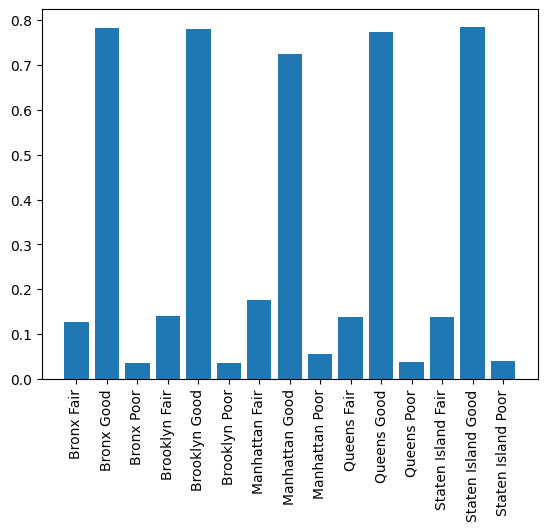

In [327]:
plt.bar(x=health_borough['bor_health'], height=health_borough['percent'])
plt.xticks(rotation=90)
plt.show()

What are the relationships amoung alive, dead, and stump across boroughs?

In [328]:
status_borough = trees.groupby(['borough','status'])['tree_id'].count().reset_index(name='count')

status_borough

,borough,status,count
0,Bronx,Alive,80585
1,Bronx,Dead,2530
2,Bronx,Stump,2088
3,Brooklyn,Alive,169744
4,Brooklyn,Dead,3319
5,Brooklyn,Stump,4230
6,Manhattan,Alive,62427
7,Manhattan,Dead,1802
8,Manhattan,Stump,1194
9,Queens,Alive,237974


In [329]:
status_borough = status_borough.merge(
    borough_totals,
    on='borough',
    how='left'
)

status_borough.head(10)

,borough,status,count,borough_total
0,Bronx,Alive,80585,85203
1,Bronx,Dead,2530,85203
2,Bronx,Stump,2088,85203
3,Brooklyn,Alive,169744,177293
4,Brooklyn,Dead,3319,177293
5,Brooklyn,Stump,4230,177293
6,Manhattan,Alive,62427,65423
7,Manhattan,Dead,1802,65423
8,Manhattan,Stump,1194,65423
9,Queens,Alive,237974,250551


In [330]:
status_borough['percent'] = status_borough['count'] / status_borough['borough_total']

status_borough.head()

,borough,status,count,borough_total,percent
0,Bronx,Alive,80585,85203,0.945800
1,Bronx,Dead,2530,85203,0.029694
2,Bronx,Stump,2088,85203,0.024506
3,Brooklyn,Alive,169744,177293,0.957421
4,Brooklyn,Dead,3319,177293,0.018720


In [331]:
status_borough['bor_stat'] = status_borough['borough'] + ' ' + status_borough['status']

status_borough.head()

,borough,status,count,borough_total,percent,bor_stat
0,Bronx,Alive,80585,85203,0.945800,Bronx Alive
1,Bronx,Dead,2530,85203,0.029694,Bronx Dead
2,Bronx,Stump,2088,85203,0.024506,Bronx Stump
3,Brooklyn,Alive,169744,177293,0.957421,Brooklyn Alive
4,Brooklyn,Dead,3319,177293,0.018720,Brooklyn Dead


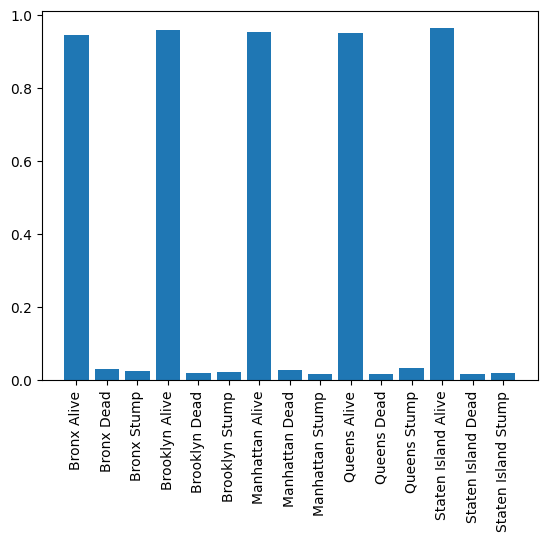

In [332]:
plt.bar(x=status_borough['bor_stat'], height=status_borough['percent'])
plt.xticks(rotation=90)
plt.show()

Manhattan seems to have the highest proportions of poor/fair health and the most noticeablely high (although slight) ratio of dead to stump. 

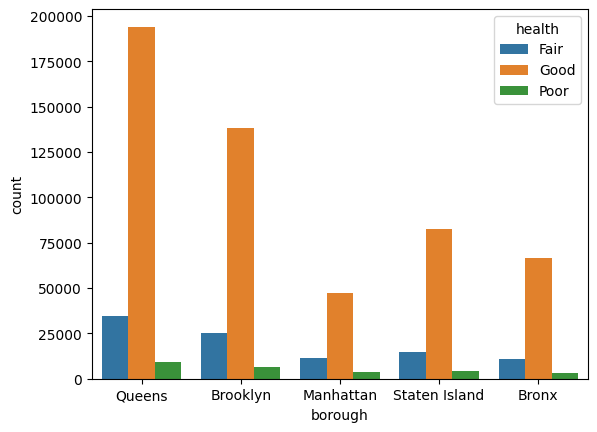

In [333]:
sns.countplot(
    data=trees,
    x='borough',
    hue='health'
)

plt.show()

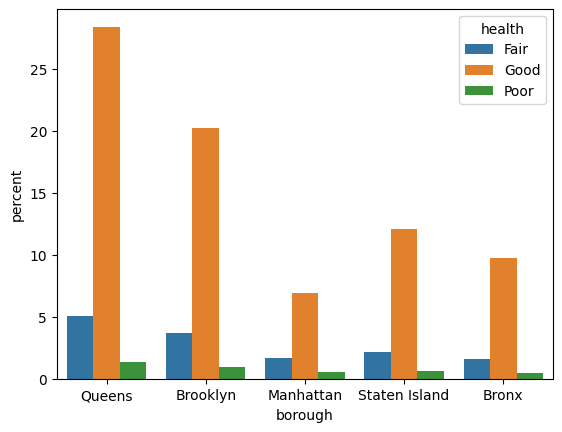

In [334]:
sns.countplot(
    data=trees,
    x='borough',
    hue='health',
    stat='percent'
)

plt.show()

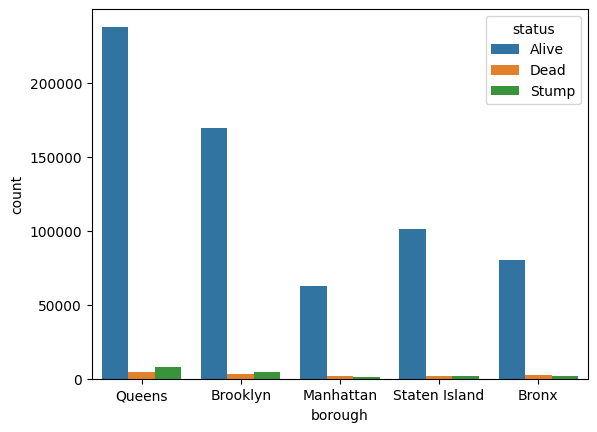

In [335]:
sns.countplot(
    data=trees,
    x='borough',
    hue='status'
)

plt.show()

## EDA on income

In [336]:
income.head()

,zipcode,num_households,median_income,mean_income
0,10451,18140,26048,40836
1,10452,25432,24790,36083
2,10453,26802,23095,33354
3,10454,12790,20210,31533
4,10455,14023,23253,32854


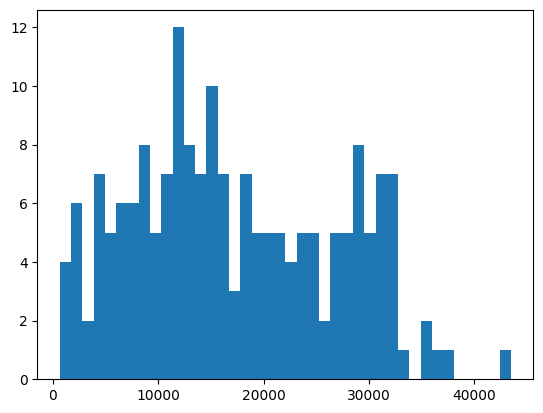

In [337]:
plt.hist(income['num_households'], bins=40)
plt.show()

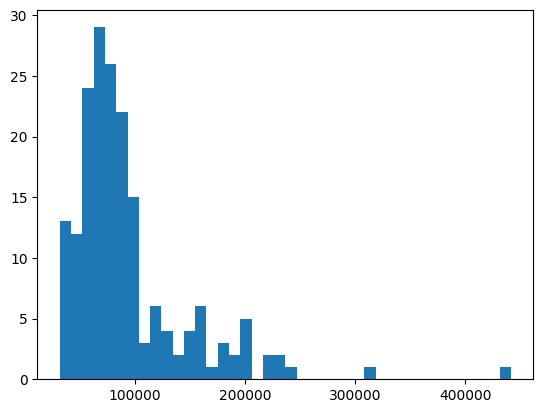

In [338]:
plt.hist(income['mean_income'], bins=40)
plt.show()

In [339]:
income[income['mean_income'] > 300000]

,zipcode,num_households,median_income,mean_income
71,10007,2781,250000,441278
133,10282,2439,250000,318142


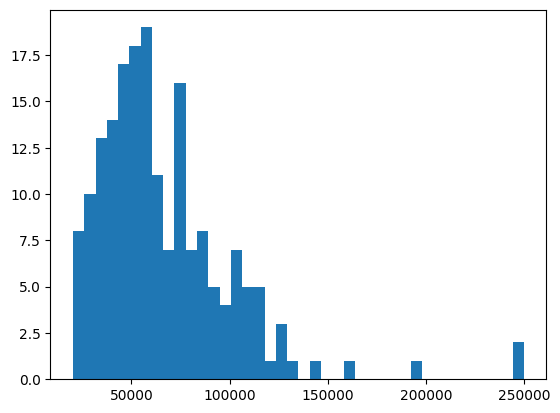

In [340]:
plt.hist(income['median_income'], bins=40)
plt.show()

In [341]:
income[income['median_income'] > 150000]

,zipcode,num_households,median_income,mean_income
71,10007,2781,250000,441278
105,10069,2850,163750,231265
117,10162,671,193510,216132
133,10282,2439,250000,318142


## Connecting trees to income for analysis

In [342]:
income.head()

,zipcode,num_households,median_income,mean_income
0,10451,18140,26048,40836
1,10452,25432,24790,36083
2,10453,26802,23095,33354
3,10454,12790,20210,31533
4,10455,14023,23253,32854


In [343]:
trees = trees.merge(income, on='zipcode', how='left')
trees.head()

,tree_id,trunk_diam,stump_diam,status,health,spc_latin,spc_common,address,zipcode,borough,neighborhood,latitude,longitude,num_households,median_income,mean_income
0,180683,3,0,Alive,Fair,Acer rubrum,red maple,108-005 70 AVENUE,11375,Queens,Forest Hills,40.723092,-73.844215,32272.0,72414.0,95909.0
1,200540,21,0,Alive,Fair,Quercus palustris,pin oak,147-074 7 AVENUE,11357,Queens,Whitestone,40.794111,-73.818679,14846.0,73750.0,91915.0
2,204026,3,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,390 MORGAN AVENUE,11211,Brooklyn,East Williamsburg,40.717581,-73.936608,37381.0,54406.0,84221.0
3,204337,10,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1027 GRAND STREET,11211,Brooklyn,East Williamsburg,40.713537,-73.934456,37381.0,54406.0,84221.0
4,189565,21,0,Alive,Good,Tilia americana,American linden,603 6 STREET,11215,Brooklyn,Park Slope-Gowanus,40.666778,-73.975979,29182.0,103716.0,144180.0


In [344]:
trees['neighborhood'].value_counts()

neighborhood
Annadale-Huguenot-Prince's Bay-Eltingville    12969
Great Kills                                   10734
Bayside-Bayside Hills                          9780
East New York                                  9607
Rossville-Woodrow                              9251
                                              ...  
Manhattanville                                  913
Parkchester                                     790
Starrett City                                   688
West Brighton                                   481
Stuyvesant Town-Cooper Village                  447
Name: count, Length: 188, dtype: int64

In [345]:
# Filtering to just alive

trees = trees[trees['status'] == 'Alive']

In [346]:
zips = trees.groupby('zipcode')['tree_id'].count().reset_index(name='count')

zips.head()


,zipcode,count
0,83,932
1,10001,850
2,10002,2158
3,10003,1943
4,10004,117


In [347]:
trees[trees['zipcode'] == 83]

,tree_id,trunk_diam,stump_diam,status,health,spc_latin,spc_common,address,zipcode,borough,neighborhood,latitude,longitude,num_households,median_income,mean_income
4771,187482,2,0,Alive,Good,Ginkgo biloba,ginkgo,201 CENTRAL PARK NORTH,83,Manhattan,Central Harlem South,40.799547,-73.955837,NaN,NaN,NaN
6269,215575,9,0,Alive,Good,Zelkova serrata,Japanese zelkova,1160 5 AVENUE,83,Manhattan,East Harlem South,40.789015,-73.955091,NaN,NaN,NaN
6270,215584,26,0,Alive,Good,Zelkova serrata,Japanese zelkova,1174 5 AVENUE,83,Manhattan,East Harlem South,40.789587,-73.954670,NaN,NaN,NaN
6295,215581,36,0,Alive,Good,Zelkova serrata,Japanese zelkova,1170 5 AVENUE,83,Manhattan,East Harlem South,40.789353,-73.954843,NaN,NaN,NaN
6318,215580,17,0,Alive,Good,Zelkova serrata,Japanese zelkova,1170 5 AVENUE,83,Manhattan,East Harlem South,40.789290,-73.954850,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672759,187479,3,0,Alive,Good,Ginkgo biloba,ginkgo,207 CENTRAL PARK NORTH,83,Manhattan,Central Harlem South,40.799665,-73.956047,NaN,NaN,NaN
672787,187462,6,0,Alive,Good,Ginkgo biloba,ginkgo,241 CENTRAL PARK NORTH,83,Manhattan,Central Harlem South,40.800295,-73.957620,NaN,NaN,NaN
672805,187470,6,0,Alive,Good,Ginkgo biloba,ginkgo,225 CENTRAL PARK NORTH,83,Manhattan,Central Harlem South,40.800050,-73.956965,NaN,NaN,NaN
672839,187481,15,0,Alive,Good,Ginkgo biloba,ginkgo,201 CENTRAL PARK NORTH,83,Manhattan,Central Harlem South,40.799596,-73.955882,NaN,NaN,NaN


In [348]:
# What is this 83 zipcode?

zip_83 = trees[trees['zipcode'] == 83]

avg_lat = zip_83['latitude'].mean()
avg_long = zip_83['longitude'].mean()

map_83 = Map(center = (avg_lat, avg_long), zoom = 13, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)

list_zip_83 = list(zip(zip_83['latitude'], zip_83['longitude']))

for lat, lon in list_zip_83:
    marker1 = CircleMarker(location=(lat, lon), color='blue', radius=1)
    map_83.add_layer(marker1)

map_83


Map(center=[np.float64(40.78292086821888), np.float64(-73.96308505509657)], controls=(ZoomControl(options=['po…

Zipcode 83 is the addresses facing Central Park--possibly an error, possibly a way to avoid the park skewing the data for the rest of the affected zipcodes.

Option for further analysis: replace 83 with correct zipcodes

# Looking at top and bottom 10 of median income grouped by zip

In [349]:
zips = zips.merge(income, on='zipcode', how='left')

zips.head()

,zipcode,count,num_households,median_income,mean_income
0,83,932,NaN,NaN,NaN
1,10001,850,11639.0,86801.0,158183.0
2,10002,2158,33348.0,33726.0,61946.0
3,10003,1943,27487.0,98151.0,161692.0
4,10004,117,1574.0,119691.0,177262.0


In [350]:
# Getting average latitude and longitude per grouped by zip code

avg_coord = trees.groupby('zipcode')[['latitude','longitude']].mean().reset_index()
zips = zips.merge(avg_coord, on='zipcode', how='left')
zips.head()

,zipcode,count,num_households,median_income,mean_income,latitude,longitude
0,83,932,NaN,NaN,NaN,40.782921,-73.963085
1,10001,850,11639.0,86801.0,158183.0,40.750288,-73.999204
2,10002,2158,33348.0,33726.0,61946.0,40.716319,-73.988285
3,10003,1943,27487.0,98151.0,161692.0,40.731852,-73.988263
4,10004,117,1574.0,119691.0,177262.0,40.703628,-74.012974


In [351]:
top_10_median = zips.sort_values(by='median_income', ascending=False).head(10)

top_10_median['count'].mean()

np.float64(492.9)

In [352]:
bottom_10_median =zips.sort_values(by='median_income', ascending=True).head(10)

bottom_10_median['count'].mean()

np.float64(2633.9)

In [353]:
bottom_10_median

,zipcode,count,num_households,median_income,mean_income,latitude,longitude
64,10454,1659,12790.0,20210.0,31533.0,40.807596,-73.917252
63,10453,2874,26802.0,23095.0,33354.0,40.852333,-73.911682
70,10460,3084,19776.0,23209.0,35624.0,40.840576,-73.880260
65,10455,1900,14023.0,23253.0,32854.0,40.815200,-73.907826
69,10459,2910,15688.0,23761.0,35964.0,40.825643,-73.894469
66,10456,3754,29255.0,23956.0,35722.0,40.829677,-73.908616
67,10457,3912,23749.0,24750.0,36604.0,40.846772,-73.898360
62,10452,3026,25432.0,24790.0,36083.0,40.837262,-73.922465
61,10451,2267,18140.0,26048.0,40836.0,40.821290,-73.922148
134,11239,953,6362.0,26186.0,34840.0,40.649818,-73.877978


In [354]:
# Mapping top 10 and bottom 10 median income

avg_lat = zips['latitude'].mean()
avg_long = zips['longitude'].mean()

map = Map(center = (avg_lat, avg_long), zoom = 10, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)

high = list(zip(top_10_median['latitude'], top_10_median['longitude']))

for lat, lon in high:
    marker1 = CircleMarker(location=(lat, lon), color='green', radius=4)
    map.add_layer(marker1)

low = list(zip(bottom_10_median['latitude'], bottom_10_median['longitude']))

for lat, lon in low:
    marker2 = CircleMarker(location=(lat, lon), color='red', radius=4)
    map.add_layer(marker2)

legend = LegendControl(
    legend={'Top 10 Median Income': 'green','Bottom 10 Median Income': 'red'},
    title='Median Income',
       position='topright'
)

map.add_control(legend)

map

Map(center=[np.float64(40.72569608463584), np.float64(-73.91508059906229)], controls=(ZoomControl(options=['po…

In [355]:
print(f"Average number of trees in Top 10 Median Income Zipcodes: {round(top_10_median['count'].mean())}")
print(f"Average number of trees in Bottom 10 Median Income Zipcodes: {round(bottom_10_median['count'].mean())}")

Average number of trees in Top 10 Median Income Zipcodes: 493
Average number of trees in Bottom 10 Median Income Zipcodes: 2634


# Repeating top and bottom 10 mapping for just Manhattan

In [356]:
manhattan = trees[trees['borough'] == 'Manhattan']
manhattan.head()

,tree_id,trunk_diam,stump_diam,status,health,spc_latin,spc_common,address,zipcode,borough,neighborhood,latitude,longitude,num_households,median_income,mean_income
5,190422,11,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,8 COLUMBUS AVENUE,10023,Manhattan,Lincoln Square,40.770046,-73.984950,32755.0,111478.0,188600.0
6,190426,11,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,120 WEST 60 STREET,10023,Manhattan,Lincoln Square,40.770210,-73.985338,32755.0,111478.0,188600.0
7,208649,9,0,Alive,Good,Tilia americana,American linden,311 WEST 50 STREET,10019,Manhattan,Clinton,40.762724,-73.987297,23146.0,94022.0,144753.0
21,193310,14,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,170 EAST 75 STREET,10021,Manhattan,Upper East Side-Carnegie Hill,40.772171,-73.960456,23739.0,115076.0,218180.0
22,199760,4,0,Alive,Fair,Quercus phellos,willow oak,2163 BROADWAY,10024,Manhattan,Upper West Side,40.782087,-73.980964,28675.0,113839.0,202005.0


In [357]:
manhattan_zip_list = manhattan['zipcode'].unique().tolist()

manhattan_zips = zips[zips['zipcode'].isin(manhattan_zip_list)]

manhattan_zips.head()

,zipcode,count,num_households,median_income,mean_income,latitude,longitude
0,83,932,NaN,NaN,NaN,40.782921,-73.963085
1,10001,850,11639.0,86801.0,158183.0,40.750288,-73.999204
2,10002,2158,33348.0,33726.0,61946.0,40.716319,-73.988285
3,10003,1943,27487.0,98151.0,161692.0,40.731852,-73.988263
4,10004,117,1574.0,119691.0,177262.0,40.703628,-74.012974


In [358]:
# Getting average latitude and longitude per grouped by zip code

top_10_manhattan = manhattan_zips.sort_values(by='median_income', ascending=False).head(10)

top_10_manhattan['count'].mean()

bottom_10_manhattan = manhattan_zips.sort_values(by='median_income', ascending=True).head(10)

bottom_10_manhattan['count'].mean()

# Mapping top 10 and bottom 10 median income

avg_lat = manhattan_zips['latitude'].mean()
avg_long = manhattan_zips['longitude'].mean()

map = Map(center = (avg_lat, avg_long), zoom = 10, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)

high = list(zip(top_10_manhattan['latitude'], top_10_manhattan['longitude']))

for lat, lon in high:
    marker1 = CircleMarker(location=(lat, lon), color='green', radius=4)
    map.add_layer(marker1)

low = list(zip(bottom_10_manhattan['latitude'], bottom_10_manhattan['longitude']))

for lat, lon in low:
    marker2 = CircleMarker(location=(lat, lon), color='red', radius=4)
    map.add_layer(marker2)

legend = LegendControl(
    legend={'Top 10 Median Income': 'green','Bottom 10 Median Income': 'red'},
    title='Median Income - Manhattan',
       position='topright'
)

map.add_control(legend)

map

Map(center=[np.float64(40.76593946939906), np.float64(-73.97583872415804)], controls=(ZoomControl(options=['po…

In [359]:
print(f"Average number of trees in Top 10 Median Income Zipcodes: {round(top_10_manhattan['count'].mean())}")
print(f"Average number of trees in Bottom 10 Median Income Zipcodes: {round(bottom_10_manhattan['count'].mean())}")

Average number of trees in Top 10 Median Income Zipcodes: 655
Average number of trees in Bottom 10 Median Income Zipcodes: 1789


Working theory: After looking at satellite images on Google Maps, it seems possible that high concentration of trees in public housing developments accounts for this finding. 